# Deployment of New Model

In [3]:
# import all the libraries
import time
import numpy as np
import cv2 
from util import *
import os,sys,re
import os.path as osp
from DNModel import net
from img_process import preprocess_img, inp_to_image
import pandas as pd
import random
import pickle as pkl
import fcn
import torch 
import torch.nn as nn
from torch.autograd import Variable
import torchvision
from torchvision import transforms as transforms
%matplotlib inline
import json
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
from new_model import *
from matplotlib.patches import Rectangle

/Users/matthewyeung/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [2]:
#Define the coco dataset
dataDir='.'
dataType='train2017'
annFile='annotation_little_v5.json'
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.51s)
creating index...
index created!


In [3]:
#number of image in the dataset
catIds = coco.getCatIds();
imgIds = coco.getImgIds()
print('Number of images:', len(imgIds))

Number of images: 5830


In [4]:
# function to deploy the new model by the input number of coco dataset
def plot_new_model(img_number):
    img = coco.loadImgs(imgIds[img_number])[0]
    img = "images/" + img['file_name']
    scores,bboxes,classes,mask = new_model(img)
    plt.figure(figsize = (15,8))
    if len(mask)>0:
        color_array = np.zeros([mask[0].shape[0], mask[0].shape[1],3], dtype=np.uint8)
        bgr_img = cv2.imread(img)
        ax = plt.gca()

        for id, b in enumerate(mask):
            if classes[id] == 0:
            #person mask
                color_array[mask[id]>0] = [255,0,0]
            elif classes[id] ==56:
            #chair mask
                color_array[mask[id]>0] = [0,255,0]
            elif classes[id] ==57:
            #couch mask
                color_array[mask[id]>0] = [0,0,255]
            elif classes[id] ==60:
            #dining table mask
                color_array[mask[id]>0] = [120,120,0]
            elif classes[id] ==61:
            #toilet
                color_array[mask[id]>0] = [0,120,120]
        
            rect = Rectangle((bboxes[id][0],
                          bboxes[id][1]), 
                         bboxes[id][2]-bboxes[id][0], 
                         bboxes[id][3]-bboxes[id][1], 
                         linewidth=2, 
                         edgecolor='r', 
                         facecolor='none')
            ax.add_patch(rect)

        added_image = cv2.addWeighted(bgr_img, 1, color_array, 0.5, 0) 
        plt.axis('off')
        plt.imshow(added_image, interpolation = 'none')
        plt.show()

## Examples

/Users/matthewyeung/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


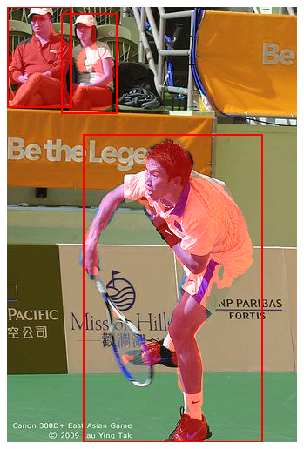

In [5]:
# There are 5830 photos in the coco dataset, input a random number (between 0 and 5830) to get photo deployed
plot_new_model(21)

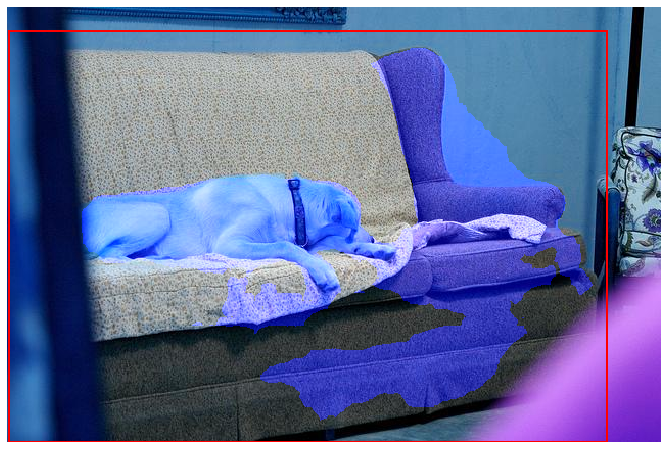

In [6]:
plot_new_model(20)

## Deploy your own photo

In [7]:
# function to deploy the new model by the input number of coco dataset
def deploy_own_photo(img_name):
    scores,bboxes,classes,mask = new_model(img_name)
    plt.figure(figsize = (15,8))
    if len(mask)>0:
        color_array = np.zeros([mask[0].shape[0], mask[0].shape[1],3], dtype=np.uint8)
        bgr_img = cv2.imread(img_name)
        ax = plt.gca()

        for id, b in enumerate(mask):
            if classes[id] == 0:
            #person mask
                color_array[mask[id]>0] = [255,0,0]
            elif classes[id] ==56:
            #chair mask
                color_array[mask[id]>0] = [0,255,0]
            elif classes[id] ==57:
            #couch mask
                color_array[mask[id]>0] = [0,0,255]
            elif classes[id] ==60:
            #dining table mask
                color_array[mask[id]>0] = [120,120,0]
            elif classes[id] ==61:
            #toilet
                color_array[mask[id]>0] = [0,120,120]
        
            rect = Rectangle((bboxes[id][0],
                          bboxes[id][1]), 
                         bboxes[id][2]-bboxes[id][0], 
                         bboxes[id][3]-bboxes[id][1], 
                         linewidth=2, 
                         edgecolor='r', 
                         facecolor='none')
            ax.add_patch(rect)

        added_image = cv2.addWeighted(bgr_img, 1, color_array, 0.5, 0) 
        plt.axis('off')
        plt.imshow(added_image, interpolation = 'none')
        plt.show()

In [ ]:
#input the file name of your own photo
deploy_own_photo('abc.jpg')